In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data = pd.read_csv(r"C:\Users\CHANDNI\Desktop\PythonProjectDataset\isha2.csv",index_col ="Date")
Data.head()

,Countries,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Genre,Employee_Type,Critical_Risk
Date,,,,,,,,
01-01-2016,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
02-01-2016,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
06-01-2016,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
08-01-2016,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
10-01-2016,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [21]:
print(Data.shape)

(439, 8)


In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 01-01-2016 to 09-07-2017
Data columns (total 8 columns):
Countries                   439 non-null object
Local                       439 non-null object
Industry_Sector             439 non-null object
Accident_Level              439 non-null object
Potential_Accident_Level    439 non-null object
Genre                       439 non-null object
Employee_Type               439 non-null object
Critical_Risk               439 non-null object
dtypes: object(8)
memory usage: 30.9+ KB


In [23]:
print(Data.columns)

Index(['Countries', 'Local', 'Industry_Sector', 'Accident_Level',
       'Potential_Accident_Level', 'Genre', 'Employee_Type', 'Critical_Risk'],
      dtype='object')


In [24]:
Data.index

Index(['01-01-2016', '02-01-2016', '06-01-2016', '08-01-2016', '10-01-2016',
       '12-01-2016', '16-01-2016', '17-01-2016', '19-01-2016', '26-01-2016',
       ...
       '23-06-2017', '19-06-2017', '22-06-2017', '22-06-2017', '29-06-2017',
       '04-07-2017', '04-07-2017', '05-07-2017', '06-07-2017', '09-07-2017'],
      dtype='object', name='Date', length=439)

# Checking Null Values

In [25]:
Missing = Data.isnull().sum()
Missing

Countries                   0
Local                       0
Industry_Sector             0
Accident_Level              0
Potential_Accident_Level    0
Genre                       0
Employee_Type               0
Critical_Risk               0
dtype: int64

# number of unique values

In [26]:
unique = Data.nunique()
unique

Countries                    3
Local                       12
Industry_Sector              3
Accident_Level               5
Potential_Accident_Level     6
Genre                        2
Employee_Type                3
Critical_Risk               34
dtype: int64

# EDA

In [27]:
Data.describe(include=['object'])

,Countries,Local,Industry_Sector,Accident_Level,Potential_Accident_Level,Genre,Employee_Type,Critical_Risk
count,439,439,439,439,439,439,439,439
unique,3,12,3,5,6,2,3,34
top,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others
freq,263,90,241,328,155,417,189,232


## Critical Risk

In [158]:
critical_risk = Data['Critical_Risk'].value_counts()
critical_risk

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Pressurized Systems / Chemical Substances     15
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Pressurized Systems                            7
Fall prevention (same level)                   7
remains of choco                               7
Fall prevention                                6
Suspended Loads                                6
Liquid Metal                                   3
Blocking and isolation of energies             3
Power lock                                     3
Projection of fragments                        2
Not applicable      

In [53]:
Data.index = pd.to_datetime(Data.index)
Data['Day of the Week'] = Data.index.dayofweek
grouped_data = pd.DataFrame(Data.groupby(['Countries','Day of the Week']).count())
grouped_data

Local  Industry_Sector  Accident_Level  \
Countries  Day of the Week                                           
Country_01 0                   33               33              33   
           1                   36               36              36   
           2                   33               33              33   
           3                   39               39              39   
           4                   55               55              55   
           5                   41               41              41   
           6                   26               26              26   
Country_02 0                   22               22              22   
           1                   23               23              23   
           2                   18               18              18   
           3                   26               26              26   
           4                   19               19              19   
           5                   15               15              15   
           6                    9                9               9   
Country_03 0                    6                6               6   
           1                    8                8               8   
           2                    6                6               6   
           3                   11               11              11   
           4                    4                4               4   
           5                    6                6               6   
           6                    3                3               3   

                            Potential_Accident_Level  Genre  Employee_Type  \
Countries  Day of the Week                                                   
Country_01 0                                      33     33             33   
           1                                      36     36             36   
           2                                      33     33             33   
           3                                      39     39             39   
           4                                      55     55             55   
           5                                      41     41             41   
           6                                      26     26             26   
Country_02 0                                      22     22             22   
           1                                      23     23             23   
           2                                      18     18             18   
           3                                      26     26             26   
           4                                      19     19             19   
           5                                      15     15             15   
           6                                       9      9              9   
Country_03 0                                       6      6              6   
           1                                       8      8              8   
           2                                       6      6              6   
           3                                      11     11             11   
           4                                       4      4              4   
           5                                       6      6              6   
           6                                       3      3              3   

                            Critical_Risk  
Countries  Day of the Week                 
Country_01 0                           33  
           1                           36  
           2                           33  
           3                           39  
           4                           55  
           5                           41  
           6                           26  
Country_02 0                           22  
           1                           23  
           2                           18  
           3                           26  
           4                           19  
      

In [48]:
grouped_data = pd.DataFrame(Data.groupby(['Industry_Sector' ,'Day of the Week']).count())
grouped_data

Countries  Local  Accident_Level  \
Industry_Sector Day of the Week                                     
Metals          0                       19     19              19   
                1                       22     22              22   
                2                       21     21              21   
                3                       24     24              24   
                4                       34     34              34   
                5                       15     15              15   
                6                       13     13              13   
Mining          0                       36     36              36   
                1                       33     33              33   
                2                       30     30              30   
                3                       40     40              40   
                4                       39     39              39   
                5                       41     41              41   
                6                       22     22              22   
Others          0                        6      6               6   
                1                       12     12              12   
                2                        6      6               6   
                3                       12     12              12   
                4                        5      5               5   
                5                        6      6               6   
                6                        3      3               3   

                                 Potential_Accident_Level  Genre  \
Industry_Sector Day of the Week                                    
Metals          0                                      19     19   
                1                                      22     22   
                2                                      21     21   
                3                                      24     24   
                4                                      34     34   
                5                                      15     15   
                6                                      13     13   
Mining          0                                      36     36   
                1                                      33     33   
                2                                      30     30   
                3                                      40     40   
                4                                      39     39   
                5                                      41     41   
                6                                      22     22   
Others          0                                       6      6   
                1                                      12     12   
                2                                       6      6   
                3                                      12     12   
                4                                       5      5   
                5                                       6      6   
                6                                       3      3   

                                 Employee_Type  Critical_Risk  
Industry_Sector Day of the Week                                
Metals          0                           19             19  
                1                           22             22  
                2                           21             21  
                3                           24             24  
                4                           34             34  
                5                           15             15  
                6                           13             13  
Mining          0                           36             36  
                1                           33             33  
                2                           30             30  
                3                           40             40  
                4                           39  

In [84]:
Data.index = pd.to_datetime(Data.index)
GB=Data.groupby([(Data.index.year),(Data.index.month)]).count()
GB


Countries  Local  Industry_Sector  Accident_Level  \
Date Date                                                      
2016 1            20     20               20              20   
     2            45     45               45              45   
     3            31     31               31              31   
     4            32     32               32              32   
     5            21     21               21              21   
     6            25     25               25              25   
     7            16     16               16              16   
     8            27     27               27              27   
     9            19     19               19              19   
     10           20     20               20              20   
     11           20     20               20              20   
     12           23     23               23              23   
2017 1            19     19               19              19   
     2            22     22               22              22   
     3             8      8                8               8   
     4            18     18               18              18   
     5            16     16               16              16   
     6            20     20               20              20   
     7             5      5                5               5   
     8            11     11               11              11   
     9             8      8                8               8   
     10            4      4                4               4   
     11            7      7                7               7   
     12            2      2                2               2   

           Potential_Accident_Level  Genre  Employee_Type  Critical_Risk  
Date Date                                                                 
2016 1                           20     20             20             20  
     2                           45     45             45             45  
     3                           31     31             31             31  
     4                           32     32             32             32  
     5                           21     21             21             21  
     6                           25     25             25             25  
     7                           16     16             16             16  
     8                           27     27             27             27  
     9                           19     19             19             19  
     10                          20     20             20             20  
     11                          20     20             20             20  
     12                          23     23             23             23  
2017 1                           19     19             19             19  
     2                           22     22             22             22  
     3                            8      8              8              8  
     4                           18     18             18             18  
     5                           16     16             16             16  
     6                           20     20             20             20  
     7                            5      5              5              5  
     8                           11     11             11             11  
     9                            8      8              8              8  
     10                           4      4              4              4  
     11                           7      7              7              7  
     12                           2      2              2              2

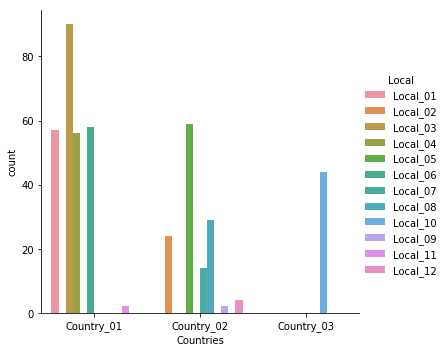

In [168]:
graph = sns.catplot(data=Data, kind="count", x="Countries",hue = "Local", height=5, aspect=1)

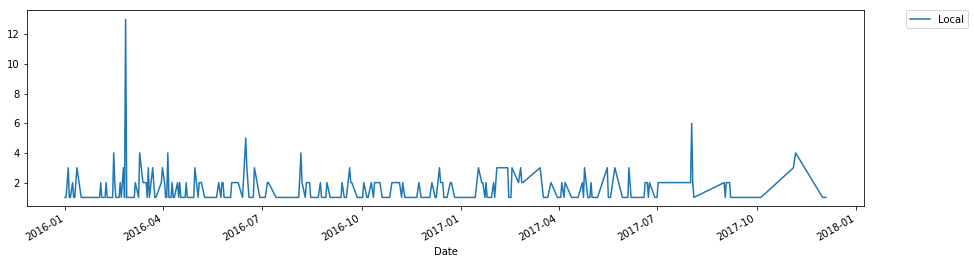

In [92]:
Data.groupby('Date').count()['Local'].plot(figsize=(15,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

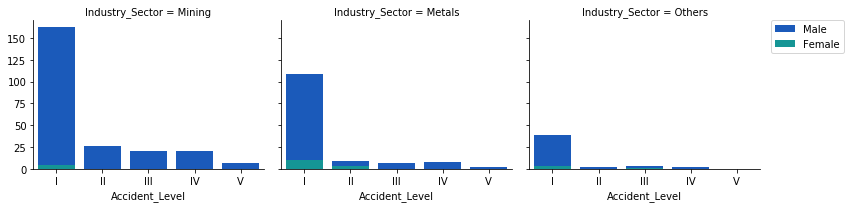

In [107]:
order={'I':1, 'II':2, 'III':3, 'IV':4, 'V':5}

figure=sns.FacetGrid(Data,aspect=1.2,palette="winter", hue='Genre',col='Industry_Sector', legend_out=True)
figure.map(sns.countplot, 'Accident_Level', order=order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


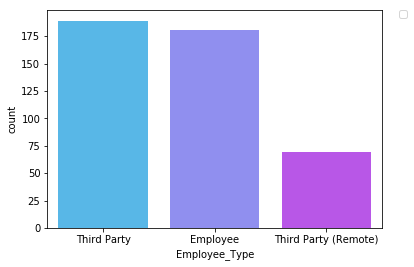

In [109]:
sns.countplot('Employee_Type',data=Data,palette='cool' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

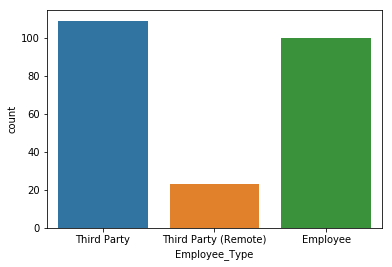

In [131]:
Data_risk_other=Data.loc[Data['Critical_Risk']=='Others']
sns.countplot('Employee_Type', data=Data_risk_other)

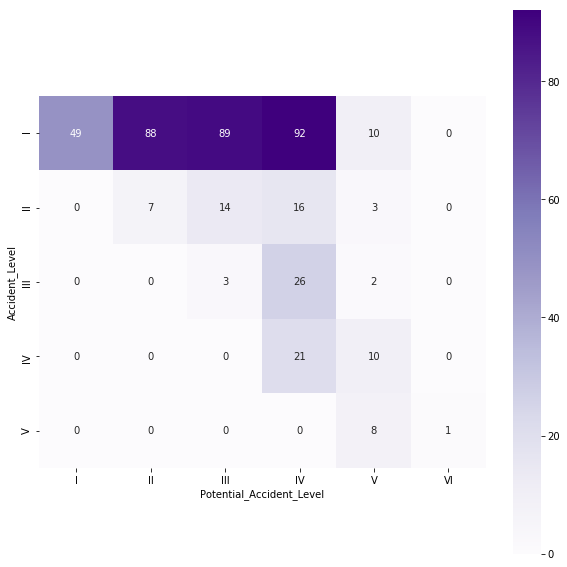

In [151]:
freq_matrix = pd.crosstab(Data.Accident_Level, Data.Potential_Accident_Level)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(freq_matrix, square=True, cmap='Purples', ax=ax, annot=True)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


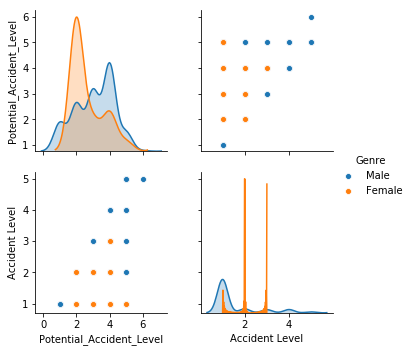

In [171]:
sns.pairplot(Data, hue='Genre', height=2.5)

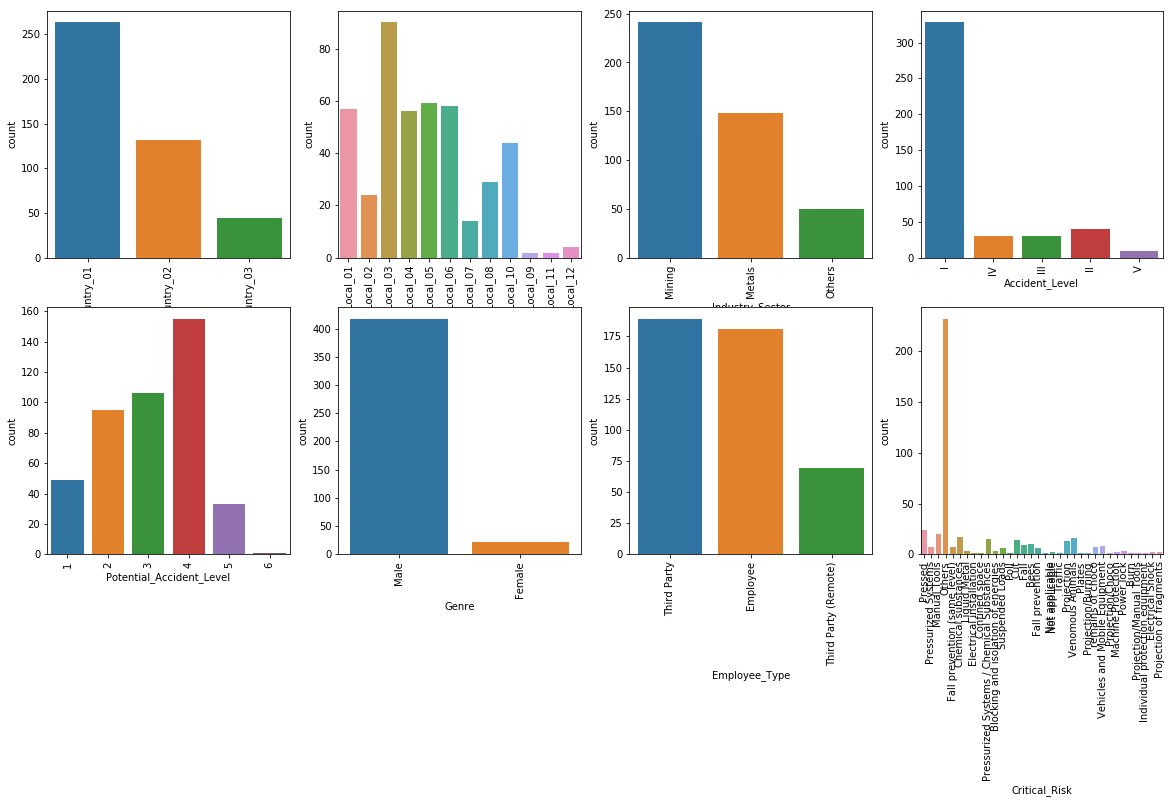

In [173]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(Data, ax.flatten()):
    sns.countplot(Data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)